In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import g_key

In [58]:
sales = pd.read_csv('../Data/sales97.csv')
geo = pd.read_csv('../Data/co_geo.csv')

heat_info = geo.join(sales.set_index('Address'), on='Address')
# heat_info['Price'] = heat_info['Price'].str.replace(',', '').str.replace('$', '')
# geo.head()
heat_info.head()

,Address,Lat,Lng,House status,Price,Street Address,Locality,Region,PostalCode,Size,Href
0,"The Castlewood Plan, Meadowlark, Parker, CO 80134",39.584733,-104.900513,New construction,481990.0,"The Castlewood Plan, Meadowlark",Parker,CO,80134,2411.0,https://www.zillow.com/community/meadowlark/20...
1,"Sheridan Plan, Ridgeline At Meridian Village, ...",39.517558,-104.816524,New construction,587950.0,"Sheridan Plan, Ridgeline at Meridian Village",Parker,CO,80134,2890.0,https://www.zillow.com/community/ridgeline-at-...
2,"5008 Raintree Cir, Parker, CO 80134",39.448100,-104.791796,House for sale,1700000.0,5008 Raintree Cir,Parker,CO,80134,7831.0,https://www.zillow.com/homedetails/5008-Raintr...
3,"10023 S Granite Hill Dr, Parker, CO 80134",39.534697,-104.807182,House for sale,635000.0,10023 S Granite Hill Dr,Parker,CO,80134,3419.0,https://www.zillow.com/homedetails/10023-S-Gra...
4,"Lapis Plan, Seasons At Stonegate, Parker, CO 8...",39.548336,-104.799163,New construction,524950.0,"Lapis Plan, Seasons at Stonegate",Parker,CO,80134,2180.0,https://www.zillow.com/community/seasons-at-st...


In [59]:
# heat_info = heat_info['Price'].dropna()
# heat_info_short= heat_info[['Name', 'lat', 'long', 'price']]
# heat_info_shot.head()
heat_info_cols = heat_info.filter(items=['Address', 'Lat', 'Lng', 'Price'])
heat_info_cols = heat_info_cols.drop(index=46)
heat_info_cols.sort_values('Price', ascending=True).head(20)

,Address,Lat,Lng,Price
1036,"7873 S Carr St, Littleton, CO 80128",39.574003,-105.092718,65000.0
1286,"63 S Sable Blvd Apt E15, Aurora, CO 80012",39.715218,-104.819698,120000.0
1284,"71 S Sable Blvd Apt B12, Aurora, CO 80012",39.715555,-104.820088,129900.0
1610,"1301 S Irving St, Denver, CO 80219",39.692916,-105.029981,129900.0
1185,"320 S Ames St Apt 3, Lakewood, CO 80226",39.710557,-105.054147,144000.0
1203,"5211 W 4th Ave Apt D, Lakewood, CO 80226",39.723383,-105.054041,147860.0
1332,"91 S Sable Blvd Apt F13, Aurora, CO 80012",39.714951,-104.820083,150000.0
568,"532 Oakwood Dr Apt B207, Castle Rock, CO 80104",39.385093,-104.857797,156500.0
1245,"471 S Kalispell Way Apt 308, Aurora, CO 80017",39.708321,-104.802200,158299.0
1241,"17074 E Tennessee Dr Apt 103, Aurora, CO 80017",39.697026,-104.789393,165000.0


In [60]:
#remove outliers
heat_info_cols=heat_info_cols.drop([141, 142, 143, 144, 145, 146, 590, 716, 892])
heat_info_cols.sort_values('Lng', ascending=False).head(20)

,Address,Lat,Lng,Price
508,"194 Vista Cliff Cir, Castle Rock, CO 80104",39.363821,-104.654931,444570.0
117,"11079 Random Valley Cir, Parker, CO 80134",39.430137,-104.678520,1150000.0
246,"10687 Evans Ridge Rd, Parker, CO 80134",39.440762,-104.689939,12900000.0
10,"Holbrook Plan, Timbers At The Pinery, Parker, ...",39.443162,-104.703069,799950.0
198,"5580 Sunridge Dr, Parker, CO 80134",39.442614,-104.704903,1003596.0
27,"Dayton Plan, Timbers At The Pinery, Parker, CO...",39.442921,-104.707283,804950.0
59,"Residence Three Plan, The Timbers At The Piner...",39.442921,-104.707283,804900.0
170,"Hanford Plan, Timbers At The Pinery, Parker, C...",39.442921,-104.707283,775950.0
119,"Monroe Plan, Timbers At The Pinery, Parker, CO...",39.442921,-104.707283,761950.0
23,"Hillary Plan, Timbers At The Pinery, Parker, C...",39.442921,-104.707283,874950.0


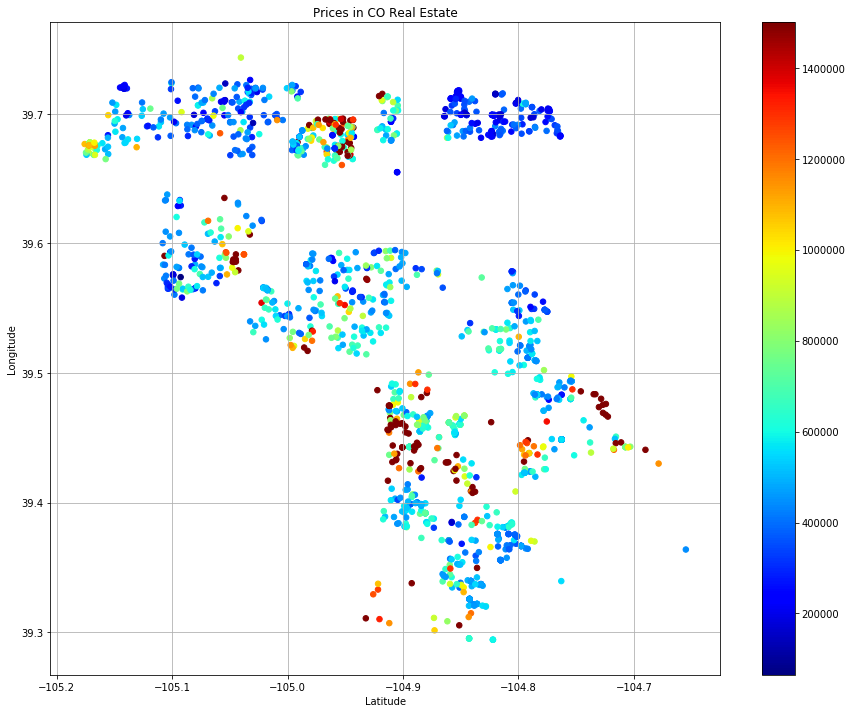

In [103]:
# fig, ax = plt.subplots()
# us = np.linspace(5, 50, 10, endpoint=True)
# z = np.array(heat_info_cols['Price'])
# z = z.reshape((len(heat_info_cols["Lat"]), len(heat_info_cols["Lng"])))
plt.figure(figsize=(15, 12))
scatter = plt.scatter(heat_info_cols["Lng"], heat_info_cols["Lat"],
            c=heat_info_cols['Price'], s=30, cmap='jet')
# contour = plt.contour(heat_info_cols["Lng"], heat_info_cols["Lat"], z, us, cmap='jet')
# ax.invert_yaxis()

plt.title("Prices in CO Real Estate")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.colorbar()
plt.clim(65000,1500000)
plt.grid(True)

# Save the figure
plt.savefig("../output/CO_realestate_scatter.png")

# Show plot
plt.show()

In [117]:
import gmaps
gmaps.configure(api_key=g_key)

# Store 'Lat' and 'Lng' into  locations 
locations = heat_info_cols[['Lat', 'Lng']].astype(float)
Price = heat_info_cols["Price"].astype(float)

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations=locations, weights=Price, max_intensity=5000000)
fig.add_layer(heat_layer)

plt.savefig("../output/CO_realestate_sheatmap.png", dpi=600)

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>